# Analytique de l'apprentissage

# Apprentissage non-supervisé

## Algorithmes de groupage et réduction de la dimension

Carnet web IPython (Jupyter Notebook) en complément du **«Chapitre 6 – Vers une IENA pilotée par les données » ** du livre : **« Vers une nouvelle ingénierie des environnements numériques d’apprentissage »**, auteurs du chapitre, Claude Coulombe & Valéry Psyché, éditeurs: Josiane Basque, Gilbert Paquette, licence code source libre MIT

### Utilisation des bibliothèques Python Pandas (manipulation des données), Sklearn (apprentissage automatique) et matplotlib (affichage graphique)

In [1852]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn

## Expériences algorithme de groupage 

    Diviser les apprenants en groupes

    réponse au quizz socio-démographique
    nombre d’heures consacrées au CLOM 
    réponses aux exercices
    certificat obtenu

<a href="https://docs.google.com/document/d/1uKaCStmIk_fgOPnuVFqCS7BnmIV_CSzEPWkmq7limSs/edit#heading=h.f0qrrmu82lyz">Projet pilote Ulibre - Analyse socio-démographique<a/>


### Questionnaire profil socio-démographique

In [1853]:
path_to_datafile = "AA_data/"

In [1854]:
IHPQ_Profil_Q1_DF = pd.read_csv(path_to_datafile+"IHPQ_profil_Q1_rep.csv", 
                                delimiter=",",
                                na_values=[""],
                                encoding='utf-8')
print(len(IHPQ_Profil_Q1_DF))
IHPQ_Profil_Q1_DF.head()

1847


,student_id,sexe
0,3320,NaN
1,13,femme
2,3985,NaN
3,4746,femme
4,3977,homme


In [1855]:
IHPQ_Profil_Q2_DF = pd.read_csv(path_to_datafile+"IHPQ_profil_Q2_rep.csv", 
                                delimiter=",",
                                na_values=[""],
                                encoding='utf-8')
print(len(IHPQ_Profil_Q2_DF))
IHPQ_Profil_Q2_DF.head()

1848


,student_id,age
0,3320,NaN
1,13,58.0
2,3985,NaN
3,4746,68.0
4,3977,26.0


In [1856]:
IHPQ_Profil_Q3_DF = pd.read_csv(path_to_datafile+"IHPQ_profil_Q3_rep.csv", 
                                delimiter=",",
                                na_values=[""],
                                encoding='utf-8')
print(len(IHPQ_Profil_Q3_DF))
IHPQ_Profil_Q3_DF.head()

1848


,student_id,pays
0,3320,NaN
1,13,Canada - Qc
2,3985,NaN
3,4746,Canada - Qc
4,3977,Canada - Qc


In [1857]:
IHPQ_CLUSTER_VEC_DF = pd.merge(left=IHPQ_Profil_Q1_DF,right=IHPQ_Profil_Q2_DF,
                               left_on='student_id', right_on='student_id')
IHPQ_CLUSTER_VEC_DF = pd.merge(left=IHPQ_CLUSTER_VEC_DF,right=IHPQ_Profil_Q3_DF,
                               left_on='student_id', right_on='student_id')
IHPQ_CLUSTER_VEC_DF.head()

,student_id,sexe,age,pays
0,3320,NaN,NaN,NaN
1,13,femme,58.0,Canada - Qc
2,3985,NaN,NaN,NaN
3,4746,femme,68.0,Canada - Qc
4,3977,homme,26.0,Canada - Qc


In [1858]:
print(len(IHPQ_CLUSTER_VEC_DF))

1847


In [1859]:
IHPQ_CLUSTER_VEC_DF['age'] = IHPQ_CLUSTER_VEC_DF['age'].apply(lambda age: False if pd.isna(age) is True else True)
IHPQ_CLUSTER_VEC_DF['sexe'] = IHPQ_CLUSTER_VEC_DF['sexe'].apply(lambda sexe: False if pd.isna(sexe) is True else True)
IHPQ_CLUSTER_VEC_DF['pays'] = IHPQ_CLUSTER_VEC_DF['pays'].apply(lambda pays: False if pd.isna(pays) is True else True)
print(len(IHPQ_CLUSTER_VEC_DF))
IHPQ_CLUSTER_VEC_DF.head()

1847


,student_id,sexe,age,pays
0,3320,False,False,False
1,13,True,True,True
2,3985,False,False,False
3,4746,True,True,True
4,3977,True,True,True


In [1860]:
IHPQ_CLUSTER_VEC_DF['profil'] = np.logical_or(IHPQ_CLUSTER_VEC_DF['sexe'],IHPQ_CLUSTER_VEC_DF['age'])
IHPQ_CLUSTER_VEC_DF['profil'] = np.logical_or(IHPQ_CLUSTER_VEC_DF['profil'],IHPQ_CLUSTER_VEC_DF['pays'])
IHPQ_CLUSTER_VEC_DF['profil'] = IHPQ_CLUSTER_VEC_DF['profil'].apply(lambda profil: 1 if profil is True else 0)
IHPQ_CLUSTER_VEC_DF = IHPQ_CLUSTER_VEC_DF.drop(['sexe','age','pays'],axis=1)
print(len(IHPQ_CLUSTER_VEC_DF))
IHPQ_CLUSTER_VEC_DF.head()

1847


,student_id,profil
0,3320,0
1,13,1
2,3985,0
3,4746,1
4,3977,1


### Questionnaire final et heures travaillées par semaine

In [1861]:
IHPQ_Final_Q1_DF = pd.read_csv(path_to_datafile+"IHPQ_final_Q1_rep.csv",
                               delimiter=",",
                               na_values=[""],
                               encoding='utf-8')
print(len(IHPQ_Final_Q1_DF))
IHPQ_Final_Q1_DF.head()

809


,student_id,worked_hours
0,13,NaN
1,3320,NaN
2,4171,Entre 1 et 2 heures
3,3985,NaN
4,842,NaN


In [1862]:
IHPQ_Final_Q1_DF['worked_hours'] = IHPQ_Final_Q1_DF['worked_hours'].apply(lambda etiquette: etiquette.replace(' ','_') if type(etiquette) is str else etiquette)

In [1863]:
IHPQ_Final_Q1_DF.groupby("worked_hours").size()

worked_hours
Entre_1_et_2_heures    286
Entre_2_et_4_heures    226
Entre_4_et_6_heures     61
Moins_d'une_heure       31
Plus_de_6_heures        12
dtype: int64

In [1864]:
IHPQ_Final_Q1_DF.loc[IHPQ_Final_Q1_DF['worked_hours'] == "Moins_d'une_heure",'worked_hours'] = 0.5
IHPQ_Final_Q1_DF.loc[IHPQ_Final_Q1_DF['worked_hours'] == "Entre_1_et_2_heures",'worked_hours'] = 1.5
IHPQ_Final_Q1_DF.loc[IHPQ_Final_Q1_DF['worked_hours'] == "Entre_2_et_4_heures",'worked_hours'] = 3.0
IHPQ_Final_Q1_DF.loc[IHPQ_Final_Q1_DF['worked_hours'] == "Entre_4_et_6_heures",'worked_hours'] = 5.0
IHPQ_Final_Q1_DF.loc[IHPQ_Final_Q1_DF['worked_hours'] == "Plus_de_6_heures",'worked_hours'] = 6.0
print(len(IHPQ_Final_Q1_DF))
IHPQ_Final_Q1_DF.head()

809


,student_id,worked_hours
0,13,NaN
1,3320,NaN
2,4171,1.5
3,3985,NaN
4,842,NaN


In [1865]:
IHPQ_CLUSTER_VEC_DF = pd.merge(left=IHPQ_CLUSTER_VEC_DF,right=IHPQ_Final_Q1_DF,
                               on='student_id', how='left')
IHPQ_CLUSTER_VEC_DF.head()

,student_id,profil,worked_hours
0,3320,0,NaN
1,13,1,NaN
2,3985,0,NaN
3,4746,1,NaN
4,3977,1,1.5


In [1866]:
IHPQ_CLUSTER_VEC_DF['worked_hours'] = IHPQ_CLUSTER_VEC_DF['worked_hours'].fillna(0)
IHPQ_CLUSTER_VEC_DF['worked_hours'] = IHPQ_CLUSTER_VEC_DF['worked_hours']/6
print(len(IHPQ_CLUSTER_VEC_DF))
IHPQ_CLUSTER_VEC_DF.head()

1847


,student_id,profil,worked_hours
0,3320,0,0.00
1,13,1,0.00
2,3985,0,0.00
3,4746,1,0.00
4,3977,1,0.25


In [1867]:
IHPQ_Notes_DF = pd.read_csv(path_to_datafile+"DF_notes_CTF_test.csv", 
                            delimiter=",",
                            na_values=[""],
                            encoding='utf-8')
pd.options.display.max_colwidth = 1000
IHPQ_Notes_DF.head()

,student_id,grade_Q1_2_1,grade_Q1_2_2,grade_Q1_2_3,grade_Q1_3_1,grade_Q1_3_2,grade_Q1_4_1,grade_Q1_4_2,grade_Q1_6_1,grade_Q1_6_2,...,grade_Q5_2_2,grade_Q5_3_1,grade_Q5_3_2,grade_Q5_5_1,grade_Q5_5_2,grade_Q5_5_3,grade_Q5_5_4,grade_Q5_6_1,grade_Q5_8_1,grade_Q5_8_2
0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,0.0,0.0,0.444444,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,1.0,1.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1868]:
IHPQ_Notes_DF['exercices'] =  np.nan
IHPQ_Notes_DF.head()

,student_id,grade_Q1_2_1,grade_Q1_2_2,grade_Q1_2_3,grade_Q1_3_1,grade_Q1_3_2,grade_Q1_4_1,grade_Q1_4_2,grade_Q1_6_1,grade_Q1_6_2,...,grade_Q5_3_1,grade_Q5_3_2,grade_Q5_5_1,grade_Q5_5_2,grade_Q5_5_3,grade_Q5_5_4,grade_Q5_6_1,grade_Q5_8_1,grade_Q5_8_2,exercices
0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,0.0,0.0,0.444444,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,1.0,1.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Calcul d'un attribut spécial pour les exercices

L'idée est de compter le nombre d'exercices essayés en donnant davantage de poids aux exercices à mesure que l'on avance dans le cours en ajoutant l"index de l'exercice. 

In [1869]:
poids_max = 0
rangee_poids_max = None
for index_rangee, rangee in IHPQ_Notes_DF.iterrows():
    poids = 0
    for index_exercice, exercice_id in zip(range(1,len(IHPQ_Notes_DF.columns)),list(IHPQ_Notes_DF.columns)[1:]):
        if not pd.isna(rangee[exercice_id]):
            poids += int(rangee[exercice_id])+index_exercice
    IHPQ_Notes_DF.loc[IHPQ_Notes_DF['student_id'] == rangee['student_id'],'exercices'] = poids
    if poids >= poids_max:
        poids_max = poids
print("poids_max",poids_max)

poids_max 1372


In [1870]:
IHPQ_Notes_DF['exercices'] = IHPQ_Notes_DF['exercices']/poids_max

In [1871]:
col_to_drop = range(1,len(IHPQ_Notes_DF.columns)-1)
IHPQ_Notes_DF.drop(IHPQ_Notes_DF.columns[col_to_drop],axis=1,inplace=True)
IHPQ_Notes_DF.head()

,student_id,exercices
0,5,0.000000
1,6,0.013848
2,8,0.000000
3,13,0.196793
4,33,0.000000


In [1872]:
IHPQ_CLUSTER_VEC_DF = pd.merge(left=IHPQ_CLUSTER_VEC_DF,right=IHPQ_Notes_DF,
                               on='student_id', how='left')
IHPQ_CLUSTER_VEC_DF.head()

,student_id,profil,worked_hours,exercices
0,3320,0,0.00,0.015306
1,13,1,0.00,0.196793
2,3985,0,0.00,0.000000
3,4746,1,0.00,NaN
4,3977,1,0.25,NaN


In [1873]:
IHPQ_CLUSTER_VEC_DF = IHPQ_CLUSTER_VEC_DF.fillna(0)
IHPQ_CLUSTER_VEC_DF.head()

,student_id,profil,worked_hours,exercices
0,3320,0,0.00,0.015306
1,13,1,0.00,0.196793
2,3985,0,0.00,0.000000
3,4746,1,0.00,0.000000
4,3977,1,0.25,0.000000


### Attestation et note globale

In [1874]:
IHPQ_Notes_Attestations_DF = pd.read_csv(path_to_datafile+"IHPQ_attestation_timeorg.csv",
                                   delimiter=",",
                                   na_values=[""],
                                   encoding='utf-8')
pd.options.display.max_colwidth = 1000
IHPQ_Notes_Attestations_DF.head(10)

,student_id,grade,attestation,time_organization
0,13,8,notpassing,***
1,369,0,notpassing,***
2,4672,89,generating,A des moments tres variables*Surtout durant la semaine - peu la fin de semaine*A egalite : le jour et en soiree*Jamais
3,5554,20,notpassing,***
4,5611,84,generating,A des moments tres variables*Surtout durant la semaine - peu la fin de semaine*A egalite : le jour et en soiree*Parfois
5,4462,90,generating,A des moments tres variables*En semaine ou la fin de semaine a egalite*Surtout le jour : entre 8h00 et 18h00.*Parfois
6,6132,55,notpassing,***
7,608,86,generating,Plage de temps reservee avec quelques exceptions*En semaine ou la fin de semaine a egalite*A egalite : le jour et en soiree*Jamais
8,4344,91,generating,A des moments tres variables*Surtout durant la semaine - peu la fin de semaine*Surtout en soiree : apres 18h00.*Parfois
9,4051,91,generating,A des moments tres variables*Surtout durant la semaine - peu la fin de semaine*Surtout le jour : entre 8h00 et 18h00.*Parfois


In [1875]:
IHPQ_Notes_Attestations_DF['attestation'] = IHPQ_Notes_Attestations_DF['attestation'].apply(lambda attestation: 1.0 if attestation == 'generating' else 0.0).values

In [1876]:
IHPQ_Notes_Attestations_DF['grade'] = IHPQ_Notes_Attestations_DF['grade']/100.0

In [1877]:
IHPQ_Notes_Attestations_DF = IHPQ_Notes_Attestations_DF.drop(['time_organization','grade'],axis=1)
IHPQ_Notes_Attestations_DF.head()

,student_id,attestation
0,13,0.0
1,369,0.0
2,4672,1.0
3,5554,0.0
4,5611,1.0


In [1878]:
IHPQ_CLUSTER_VEC_DF = pd.merge(left=IHPQ_CLUSTER_VEC_DF,right=IHPQ_Notes_Attestations_DF,
                               on='student_id', how='left')
IHPQ_CLUSTER_VEC_DF.head()

,student_id,profil,worked_hours,exercices,attestation
0,3320,0,0.00,0.015306,NaN
1,13,1,0.00,0.196793,0.0
2,3985,0,0.00,0.000000,NaN
3,4746,1,0.00,0.000000,NaN
4,3977,1,0.25,0.000000,NaN


In [1879]:
IHPQ_CLUSTER_VEC_DF = IHPQ_CLUSTER_VEC_DF.fillna(0)
print(len(IHPQ_CLUSTER_VEC_DF))
IHPQ_CLUSTER_VEC_DF.head()

1847


,student_id,profil,worked_hours,exercices,attestation
0,3320,0,0.00,0.015306,0.0
1,13,1,0.00,0.196793,0.0
2,3985,0,0.00,0.000000,0.0
3,4746,1,0.00,0.000000,0.0
4,3977,1,0.25,0.000000,0.0


In [1880]:
true_labels = IHPQ_CLUSTER_VEC_DF['attestation'].values

### Groupage des participants avec l'algorithme des KMoyennes

In [1881]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

In [1882]:
IHPQ_CLUSTER_VEC_With_ID_DF = IHPQ_CLUSTER_VEC_DF.copy()
IHPQ_CLUSTER_VEC_DF = IHPQ_CLUSTER_VEC_DF.drop('student_id',axis=1)
print(IHPQ_CLUSTER_VEC_DF.head())
X = IHPQ_CLUSTER_VEC_DF.values.copy()

   profil  worked_hours  exercices  attestation
0       0          0.00   0.015306          0.0
1       1          0.00   0.196793          0.0
2       0          0.00   0.000000          0.0
3       1          0.00   0.000000          0.0
4       1          0.25   0.000000          0.0


In [1883]:
X.shape

(1847, 4)

### Nuages de points en 2D selon différents attributs

Exploration des données avec un algorithme d'affichage de dispersion en nuages 2D.

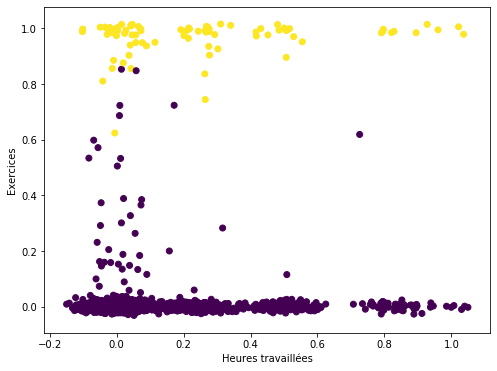

In [1884]:
import matplotlib.pyplot as plt

worked_hours = X[:,1]
exercices = X[:,2]

plt.figure(figsize=(8, 6))

worked_hours_jitter = worked_hours + np.random.normal(0, 0.05, len(worked_hours))
grade_jitter =  grade + np.random.normal(0, 0.01, len(grade))

plt.scatter(worked_hours_jitter,grade_jitter,c=true_labels)

plt.xlabel('Heures travaillées')
plt.ylabel('Exercices')
plt.show()

### Choix du nombre de groupes par la méthode du coude 

Une méthode simple pour identifier le nombre de groupes consiste à faire varier le nombre de groupes et surveiller l’évolution de l’inertie intra-classe qui mesure la qualité des groupes. L’idée est d'identifier le «coude» qui indique le point juste avant la stabilisation de la variation de l'inertie. 

L'idée est d'obtenir des groupes bien séparés et assez compacts.

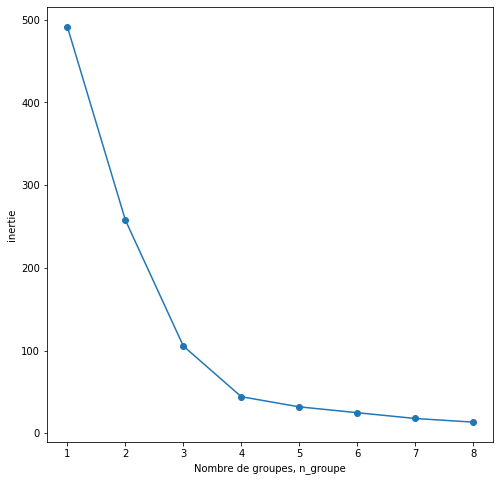

In [1885]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

n_groupes = range(1, 9)
inerties = []

for n_groupe in n_groupes:
    # Créer un modèle 
    modele_kmoyennes = KMeans(n_clusters=n_groupe)
    
    # Fit model to samples
    modele_kmoyennes.fit(X)
    
    # Append the inertia to the list of inertias
    inerties.append(modele_kmoyennes.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(8, 8))
plt.plot(n_groupes, inerties, '-o')
plt.xlabel('Nombre de groupes, n_groupe')
plt.ylabel('inertie')
plt.xticks(n_groupes)
plt.show()

Probablement 4 juste avant que la variation de l'inertie se stabilise.

In [1886]:
n_groupes = 4

## Visualisation des groupes en 2D après réduction de la dimension

On utilise l'analyse en composante principale ou ACP (en anglais PCA: Principal Components Analysis) pour choisir les deux composantes les plus influentes et visualiser une projection des nos groupes en 2D.

Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py


k-moyennes	0.03s	44	0.129	1.000	0.228	0.000	-0.000	0.796
random   	0.04s	44	0.129	1.000	0.228	0.000	-0.000	0.796


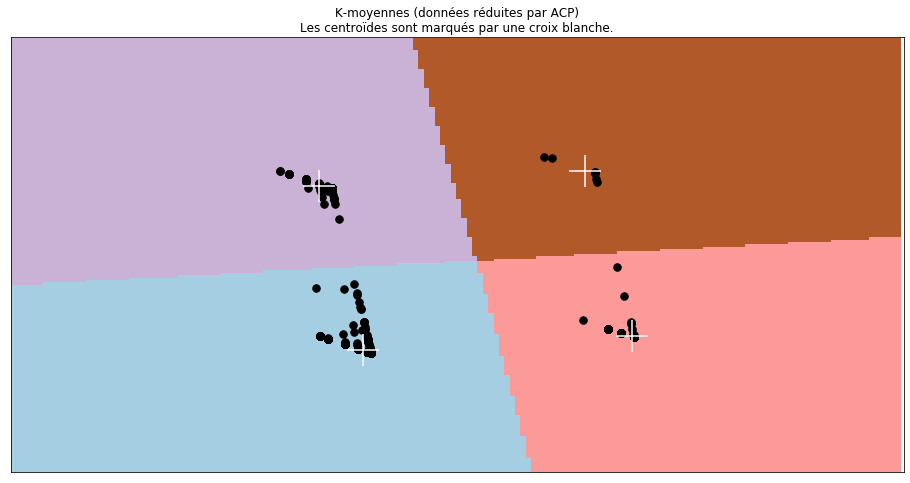

In [1887]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

data = X
n_clusters = n_groupes
max_iter = 100000000
sample_size = len(IHPQ_CLUSTER_VEC_DF)

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_,
                                                average_method='arithmetic'),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_clusters, n_init=10, max_iter=max_iter),
              name="k-moyennes", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_clusters, n_init=10),
              name="random", data=data)

# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components=2).fit_transform(data)

kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16, 8))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

# plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=15, color='black')

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=1000, linewidths=10,
            color='w', zorder=10)
plt.title('K-moyennes (données réduites par ACP)\n'
          'Les centroïdes sont marqués par une croix blanche.')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Conclusion

Nos résulats suggèrent 4 groupes de participants. D'après la littérature nou devrions identifier ces quatre types de groupes.

* Décrocheurs (drop-outs)
* Curieux (lurkers / observers)
* Adeptes du picorage (drop-ins)
* Participants appliqués (dedicated)

Seulement des recherches plus approfondies pourront nous confirmer les caractéristiques de ces groupes. 